## Student Performance Indicator

### 1) Problem statement
This project understnd how to student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course


## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the csv

In [2]:
student_data = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
student_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
student_data.shape

(1000, 8)

### 2.2 Dataset Information

* genden: sex of student -> Male / Female
* race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
* parental level of education: ("bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school')
* lunch: standard ,free/ reduced
* test preparation course: ['none' 'completed']
* math score: score
* reading score:  score
* writing score: score

## 3 Data checks to perform
* check missing values
* check duplicates
* check data types
* check the number of unique values of each column
*check statistics of data set
*check various presnt in the different categorical column

In [6]:
student_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2 check datatype

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.3 check for unique values

In [8]:
student_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check the statistics of data set

In [9]:
student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* from the above distribution all means are really close to each other
* the stds are close - between 14.60 to 15.19
* someone has a minimum score of 0 in math, the minimum score for writing is 10 and the minimum score of reading is 17
* max score is 100


### 3.7 Exploring Data

In [10]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
columns = student_data.columns
cat_features, numerical_features = [], []
for col in columns:
    if student_data[col].dtype == 'O':
        cat_features.append(col)
    else:
        numerical_features.append(col)
print(f"These are the categorical Features: {cat_features}")
print(f"These are the categorical Features: {numerical_features}")

These are the categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
These are the categorical Features: ['math score', 'reading score', 'writing score']


In [12]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
for item in cat_features:
    print(f"Categories in {item}: {student_data[item].unique()}" )

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


#### 3.8 Adding columns for "Total Score and "Average"

In [14]:
['math score', 'reading score', 'writing score']

['math score', 'reading score', 'writing score']

In [15]:
student_data["Total_score"] = student_data["math score"] +student_data["reading score"]+student_data["writing score"]
student_data["Average_score"]= student_data["Total_score"] /3

In [16]:
student_data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### count of students who scored highest marks


In [17]:
writing_full = student_data[student_data["writing score"] == 100]['writing score'].count()
reading_full = student_data[student_data["reading score"] == 100]['reading score'].count()
math_full = student_data[student_data["math score"] == 100]['math score'].count()
print(f"count of students who scored the maximum in writing: {writing_full}")
print(f"count of students who scored the maximum in reading: {reading_full}")
print(f"count of students who scored the maximum in math: {math_full}")

count of students who scored the maximum in writing: 14
count of students who scored the maximum in reading: 17
count of students who scored the maximum in math: 7


In [18]:
writing_less = student_data[student_data["writing score"] < 20]['writing score'].count()
reading_less = student_data[student_data["reading score"] < 20]['reading score'].count()
math_less = student_data[student_data["math score"] < 20]['math score'].count()
print(f"count of students who scored less in writing: {writing_less}")
print(f"count of students who scored less in reading: {reading_less}")
print(f"count of students who scored less in math: {math_less}")

count of students who scored less in writing: 3
count of students who scored less in reading: 1
count of students who scored less in math: 4


#### Insights
* Here we see that the students have performed worst in Maths
* The students have performed best in reading

## 4) Exploring Data(Visualization)
* Histogram
* Kernel Distribution Function(KDE)

#### 4.1.1 Histogram and KDE

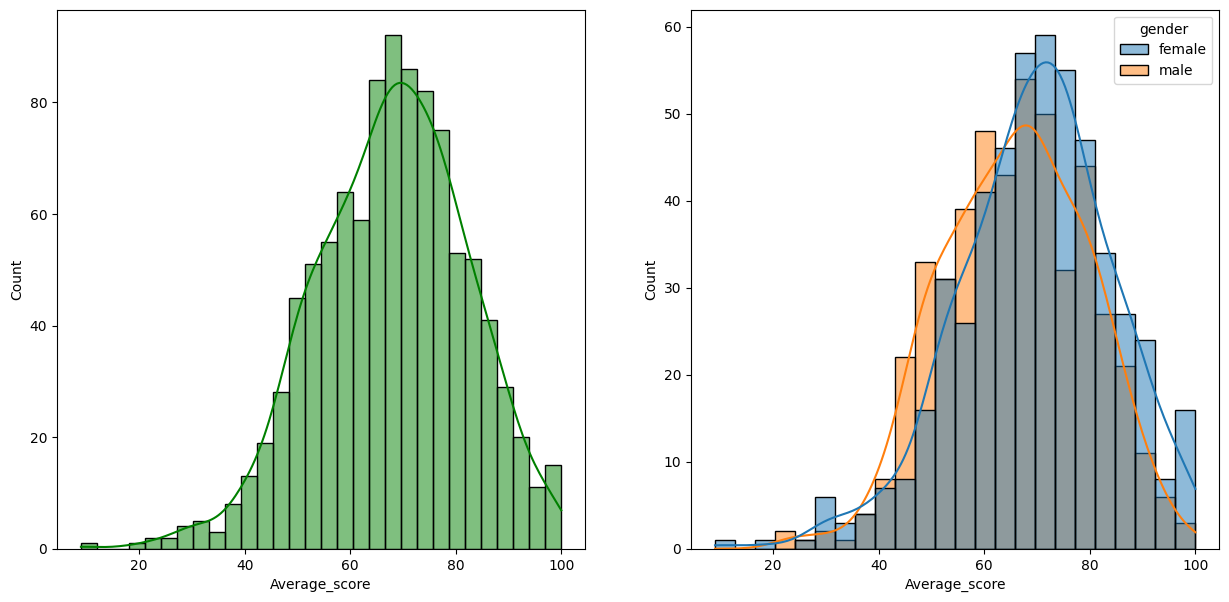

In [19]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = student_data, x = 'Average_score', bins = 30, kde =True, color = 'g')
plt.subplot(122)
sns.histplot(data = student_data, x ='Average_score', kde = True, hue='gender')
plt.show()


 From the above plot we see that females have scored greater than males

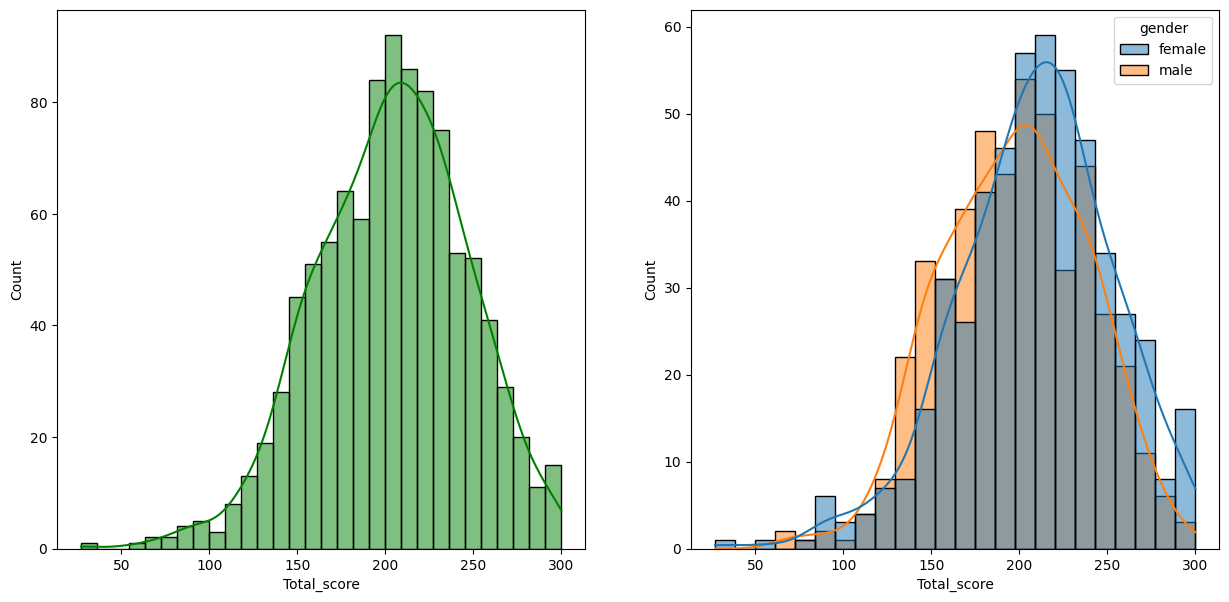

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = student_data, x = 'Total_score', bins = 30, kde =True, color = 'g')
plt.subplot(122)
sns.histplot(data = student_data, x ='Total_score', kde = True, hue='gender')
plt.show()

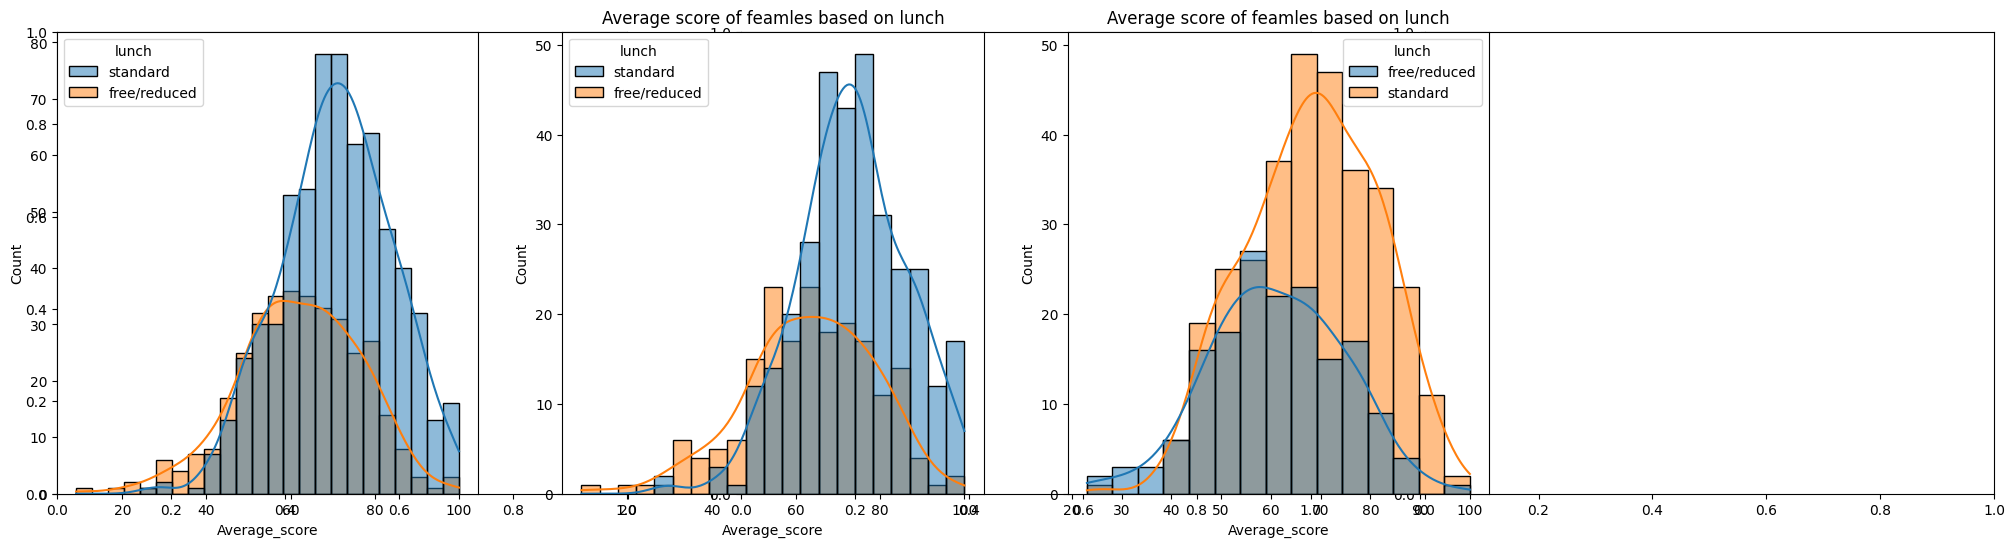

In [21]:
plt.subplots(1,3,figsize =(25,6))
plt.subplot(141)
sns.histplot(data = student_data, x= 'Average_score', kde = True, hue= 'lunch')
plt.subplot(142)
sns.histplot(data = student_data[student_data["gender"] == 'female'],kde = True, x = 'Average_score', hue = 'lunch',).set_title('Average score of feamles based on lunch')
plt.subplot(143)
sns.histplot(data = student_data[student_data["gender"] == 'male'], kde =True, x = 'Average_score', hue = 'lunch').set_title('Average score of feamles based on lunch')
plt.show()

#### Insights
* Students who opt for standard lunch performs well, This is observed in both females and males

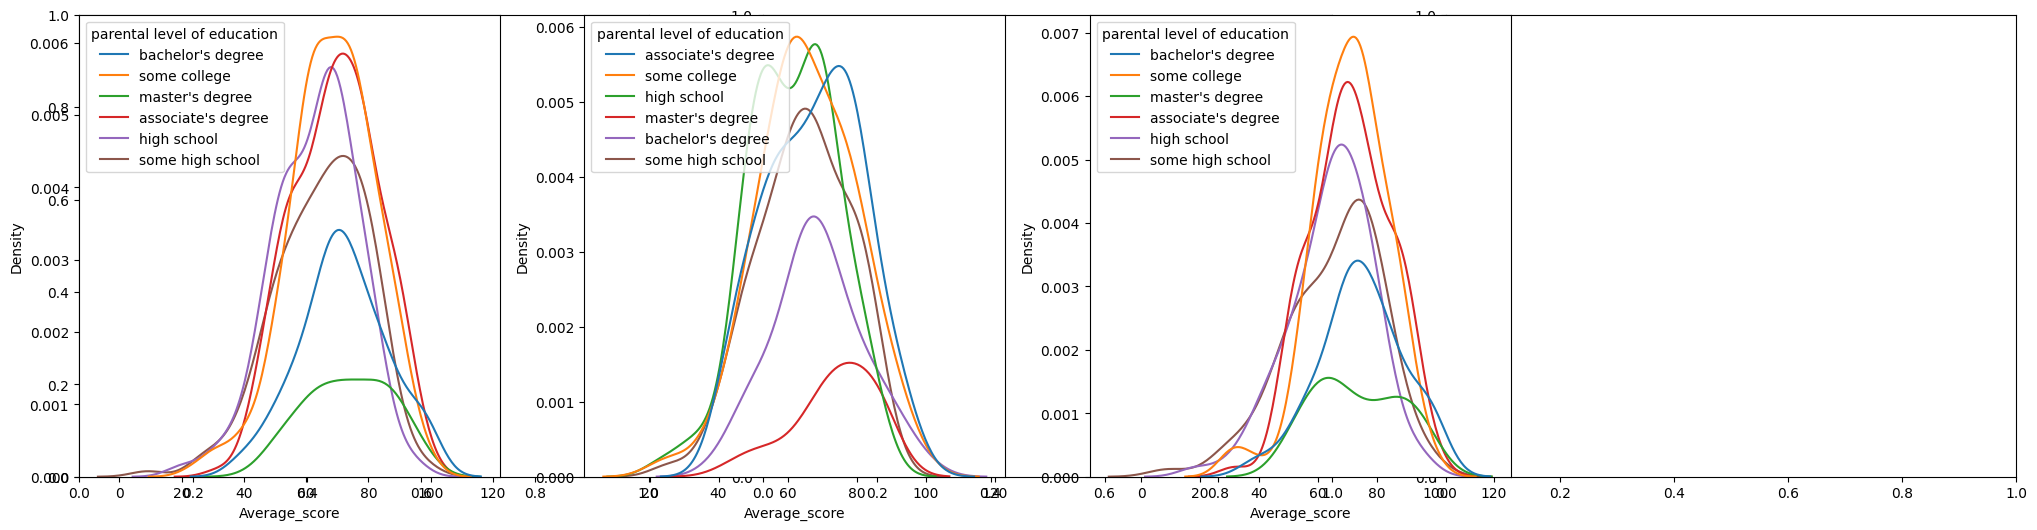

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=student_data,x='Average_score',hue='parental level of education')
plt.subplot(142)
ax =sns.kdeplot(data=student_data[student_data.gender=='male'],x='Average_score',hue='parental level of education')
plt.subplot(143)
ax =sns.kdeplot(data=student_data[student_data.gender=='female'],x='Average_score',hue='parental level of education')
plt.show()

There are key insigths the can found that tells us about the average score of the students with respect to parents level of education.
* Male students and female students I see that the parents with masters degree the students are not performing well. infact parents education from some collage or associate degree their children are performing well both in males and females

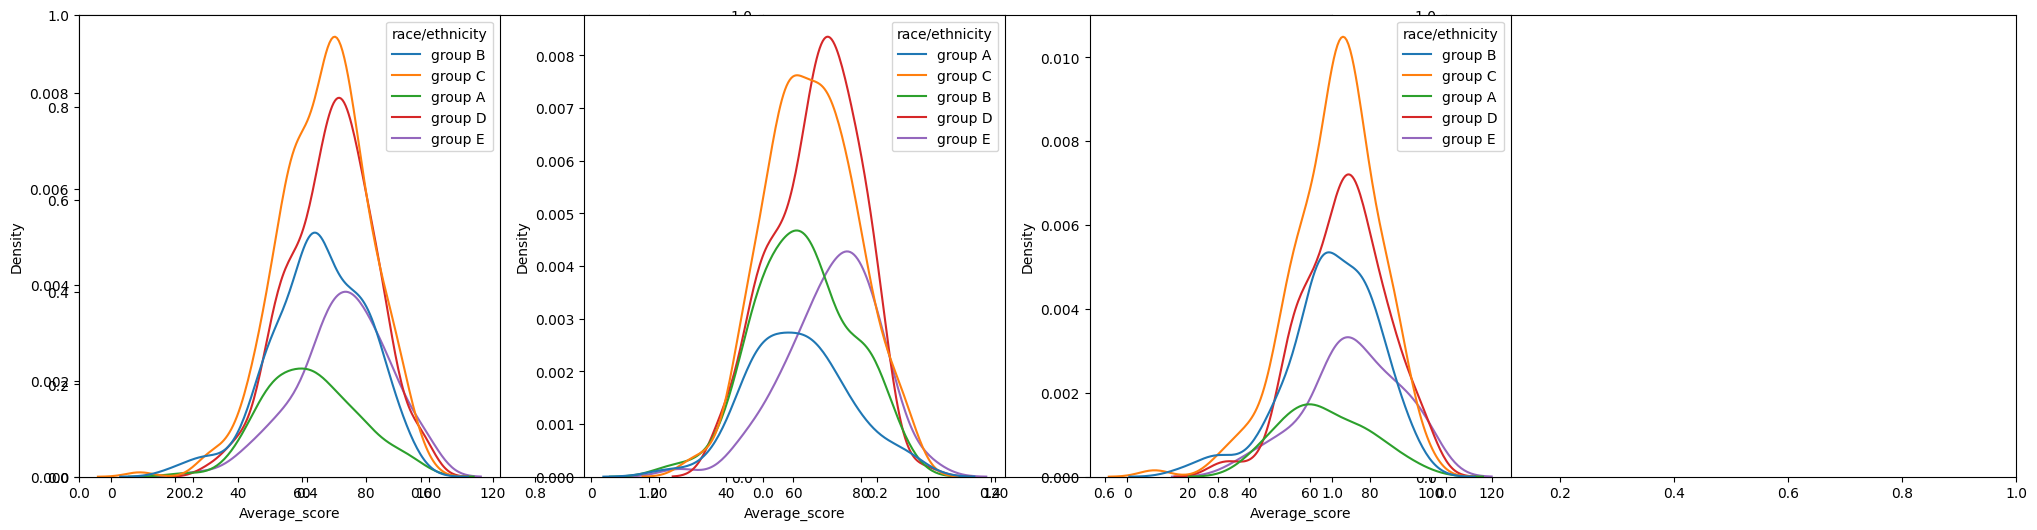

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=student_data,x='Average_score',hue='race/ethnicity')
plt.subplot(142)
ax =sns.kdeplot(data=student_data[student_data.gender=='male'],x='Average_score',hue='race/ethnicity')
plt.subplot(143)
ax =sns.kdeplot(data=student_data[student_data.gender=='female'],x='Average_score',hue='race/ethnicity')
plt.show()

* students from group C and  group D race / ethicity have performed well compared to other groups
*  Female students with group B has performed average but male students from the same group has not performed good
* Group E and Group A the students has performed the least both male and females

#### 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'Average scores'}, ylabel='Average_score'>

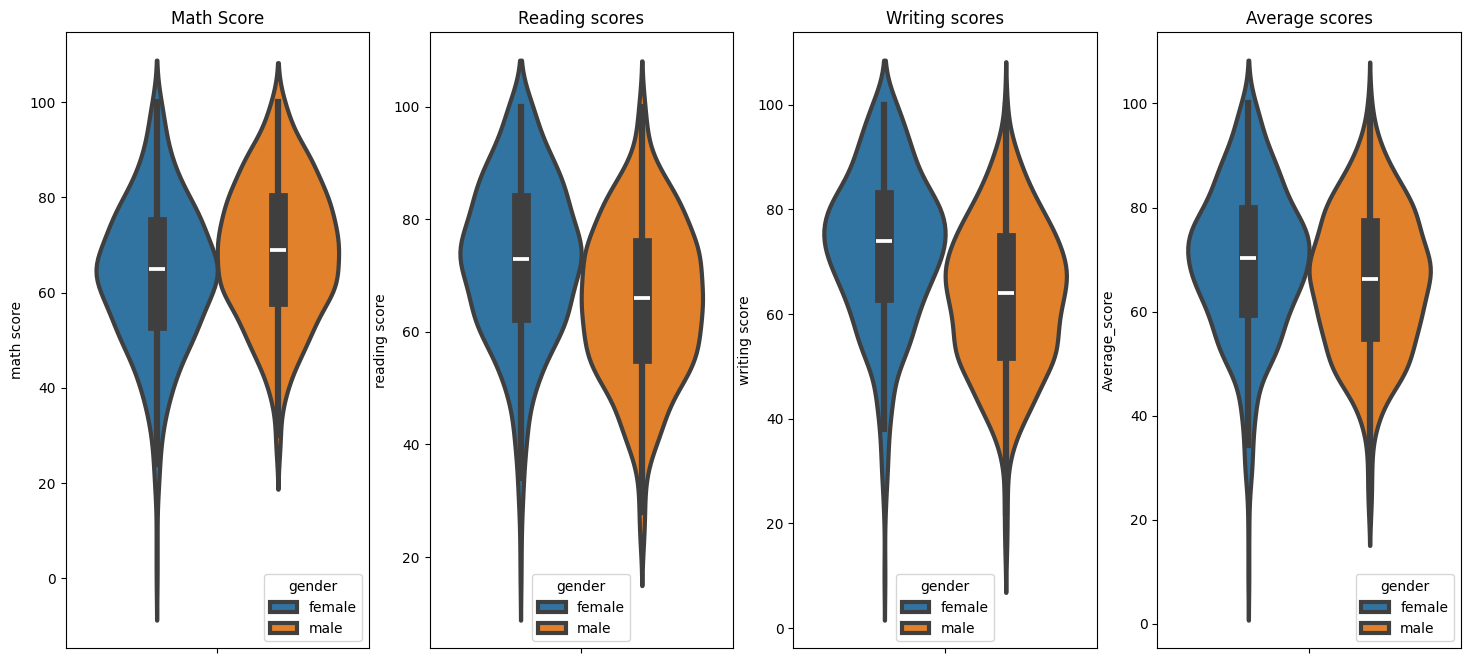

In [81]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score', data = student_data, hue = 'gender',  linewidth = 3)
plt.subplot(1,4,2)
plt.title('Reading scores')
sns.violinplot(y = 'reading score', data = student_data,hue = 'gender',  linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(y = 'writing score', data = student_data,hue = 'gender', linewidth = 3)
plt.subplot(1,4,4)
plt.title('Average scores')
sns.violinplot(y = 'Average_score', data = student_data,hue = 'gender', linewidth = 3)

* the average male students have performed well in maths compared to female students 
* But the average female students have performed well in both reading and writing when compared to male students but there are more low scorers females when compared to male
* the overall average score among all the three subjects are above 60% but on an average females have performed well compared to male
* 

### 4.3 Multivariate analysis using pieplot

In [93]:
def create_pie_plot(data, features):
    count = 1
    #palette_color = sns.color_palette('dark')
    plt.figure(figsize=(37,10))
    for col_names in features:
        plt.subplot(1,5,count)
        plt.pie(data[col_names].value_counts(), labels = data[col_names].value_counts().index,autopct = '%.0f%%')
        plt.title(col_names, fontsize = 20)
        plt.axis('off')
        count += 1
        

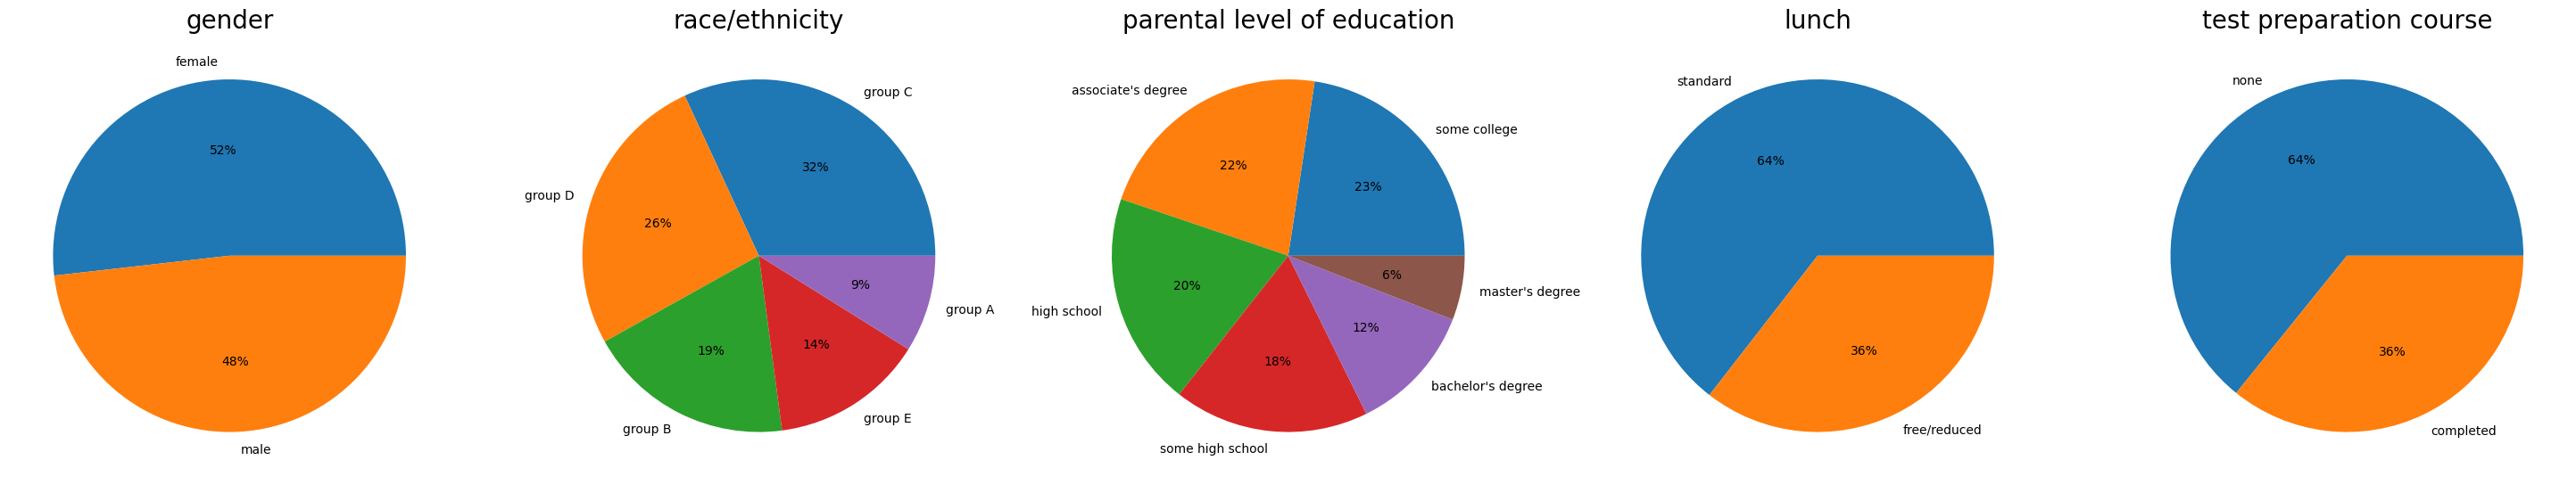

In [94]:
create_pie_plot(student_data, cat_features)

* As seen earlier there are more female students
* More % of students belongs to group D and group C and less students belongs to group A
* total of 65% students belong to parents who has gone to some college, got a bachelor's degree , masters degree
* there are only 6% and 12% of students whos parents have a masters degree or a bachlor's degree
* interesting fact is 20% of students belongs to parents whos education level is only uptill highschool
* 64% of students have not enrolled in any test preparation score are more

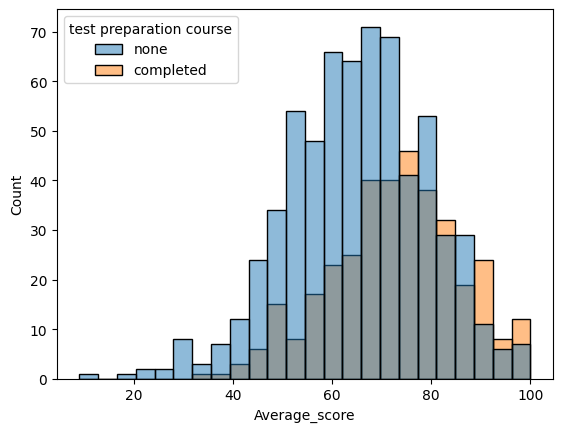

In [71]:
ax =sns.histplot(data=student_data,x='Average_score',hue='test preparation course')

* Here we can see that students who didnt enrolled for the test preparation score scored less compared to other students who completed the score

### 4.4 Feature wise visualization
#### 4.4.1 Gender column

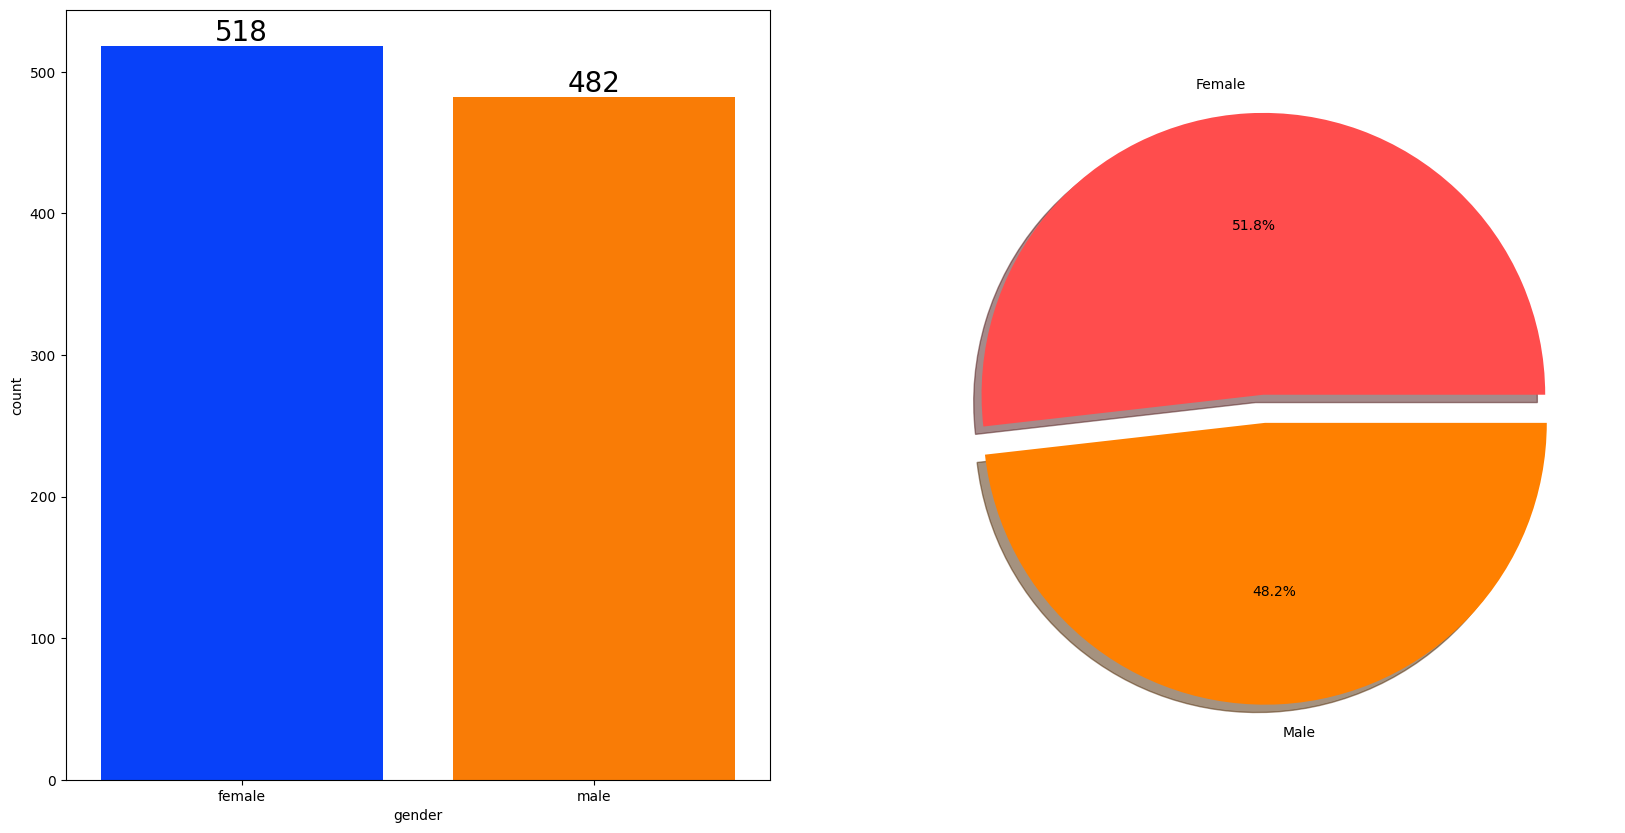

In [79]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = student_data['gender'], data = student_data, palette ='bright' , ax= ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
plt.pie(x=student_data['gender'].value_counts(),labels=['Female', 'Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

* here we see that there are more female students 518 and 482 female students. not much difference but still difference is there

### Bivariate Analysis (does gender have any impact on student's performance)

In [86]:
gender_group = student_data.groupby('gender').count()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


In [ ]:
plt.figure(figsize =(10,8))
X = ['Total Average','Math Average']


In [74]:
gender_group['average'][0]

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Average_score'],
      dtype='object')

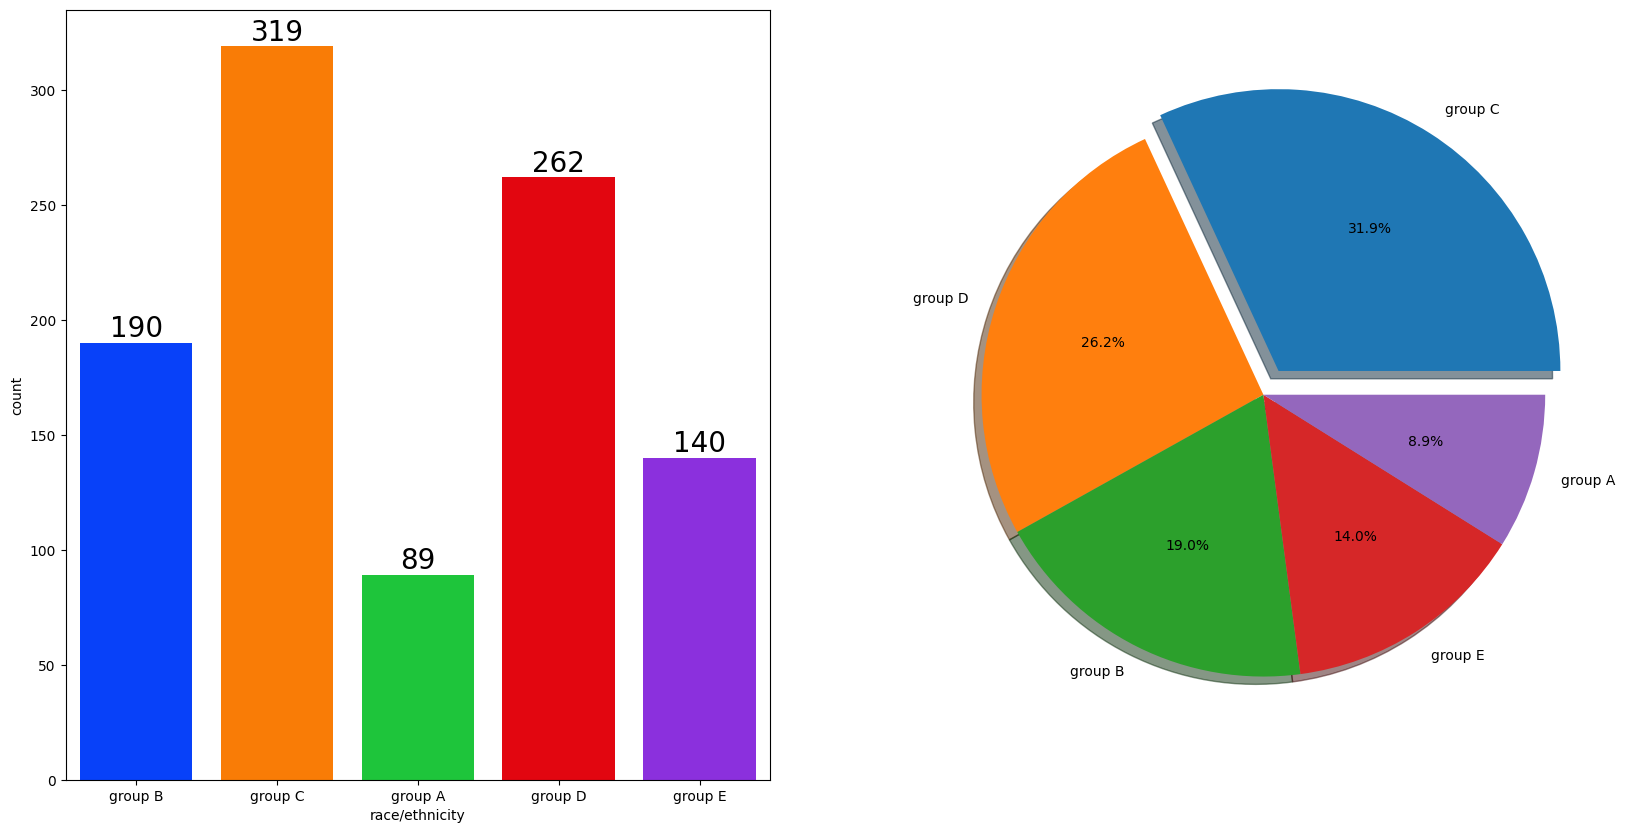

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_data['race/ethnicity'],data=student_data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = student_data['race/ethnicity'].value_counts(),labels=student_data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

* less students belongs to group A and mojority of students belong to group c and group d

#### Bivariate Analysis (is race/Ethinicity have any impact on students performance?)

In [97]:
group_by_race_ethinicity = student_data.groupby('race/ethnicity')

In [124]:
group_by_race_ethinicity['math score'].mean().index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')

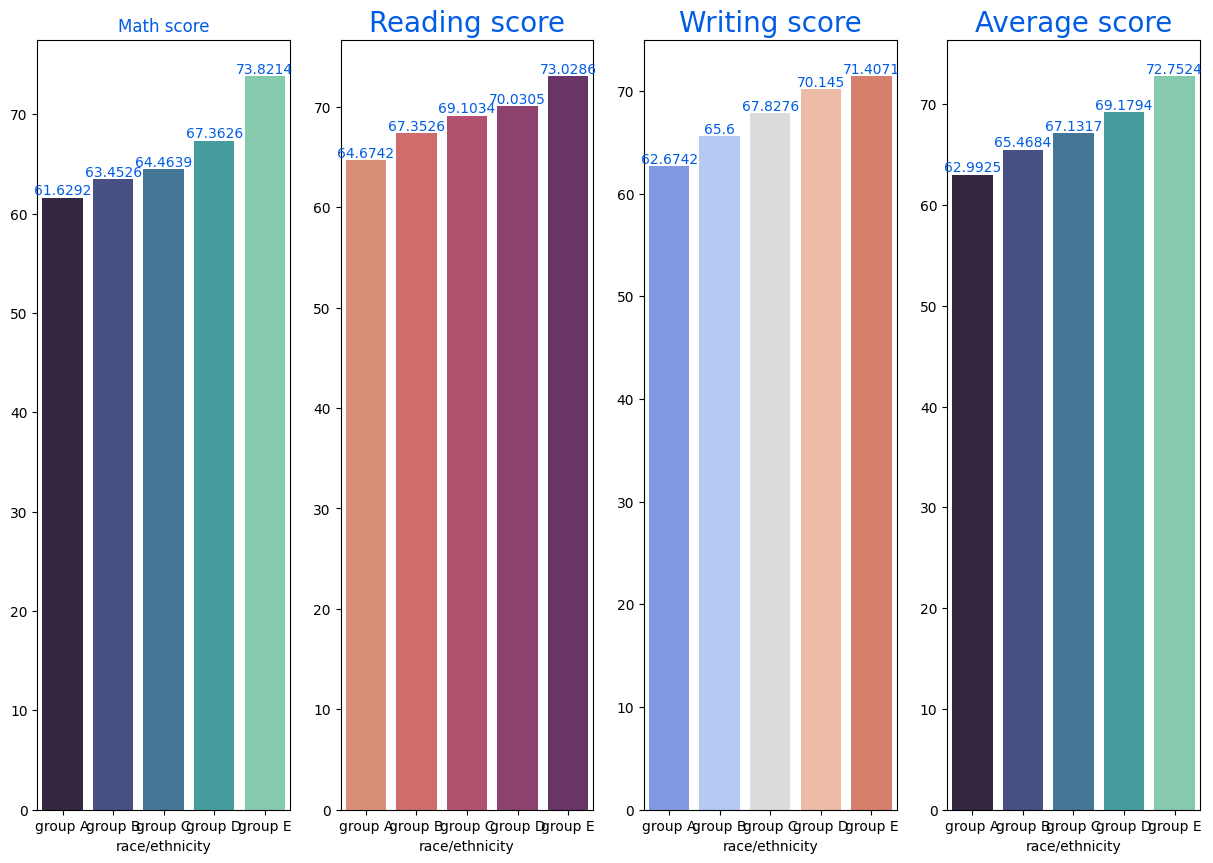

In [125]:
f, ax = plt.subplots(1,4, figsize =(15,10))
sns.barplot(x= group_by_race_ethinicity['math score'].mean().index, y = group_by_race_ethinicity['math score'].mean().values, palette ='mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6')

for container in ax[0].containers:
    ax[0].bar_label(container, color = '#005ce6', size = 10)

sns.barplot(x= group_by_race_ethinicity['reading score'].mean().index, y = group_by_race_ethinicity['reading score'].mean().values, palette='flare', ax =ax[1])
ax[1].set_title('Reading score', color = '#005ce6', size = 20)
for container in ax[1].containers:
    ax[1].bar_label(container, color = '#005ce6', size = 10)
    
sns.barplot(x= group_by_race_ethinicity['writing score'].mean().index, y = group_by_race_ethinicity['writing score'].mean().values, palette='coolwarm', ax =ax[2])
ax[2].set_title('Writing score', color = '#005ce6', size = 20)
for container in ax[2].containers:
    ax[2].bar_label(container, color = '#005ce6', size = 10)
    
sns.barplot(x= group_by_race_ethinicity['Average_score'].mean().index, y = group_by_race_ethinicity['Average_score'].mean().values, palette='mako', ax =ax[3])
ax[3].set_title('Average score', color = '#005ce6', size = 20)
for container in ax[3].containers:
    ax[3].bar_label(container, color = '#005ce6', size = 10)



* children belonging to group E has scored the highest marks and students belonging to group A has scored the lowest
* we saw that there were less number of students belonging to group A and these students have performed the lowest

### Bivariate Analysis (Does parental education) have an impact on students performance

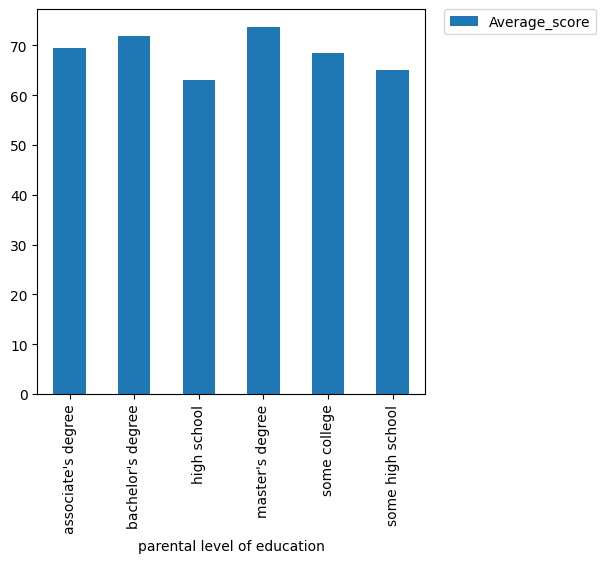

In [140]:
groupby_score_parental_level_of_education =student_data.groupby('parental level of education')
groupby_score_parental_level_of_education['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* students who's parents have a mastes degree and bachelor degree, their performance are good
* students with lowest performance have parents with high school degree

#### Lunch column

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? 

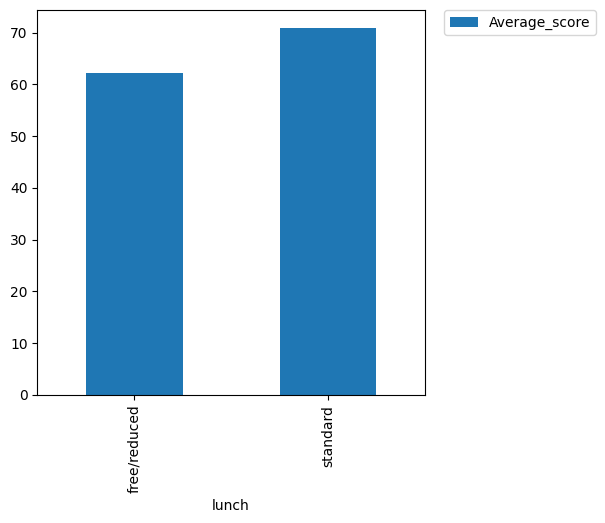

In [142]:
group_by_lunch_average_score = student_data.groupby('lunch')
group_by_lunch_average_score['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* students with standard lunch they are performing better compared to free/reduced

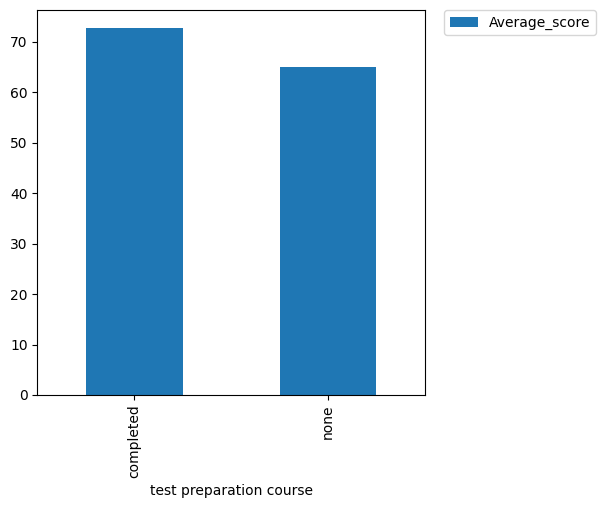

In [153]:
group_by_test_preparation_course = student_data.groupby('test preparation course')
group_by_test_preparation_course['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



* Students who have completed the course has scored better than the other group

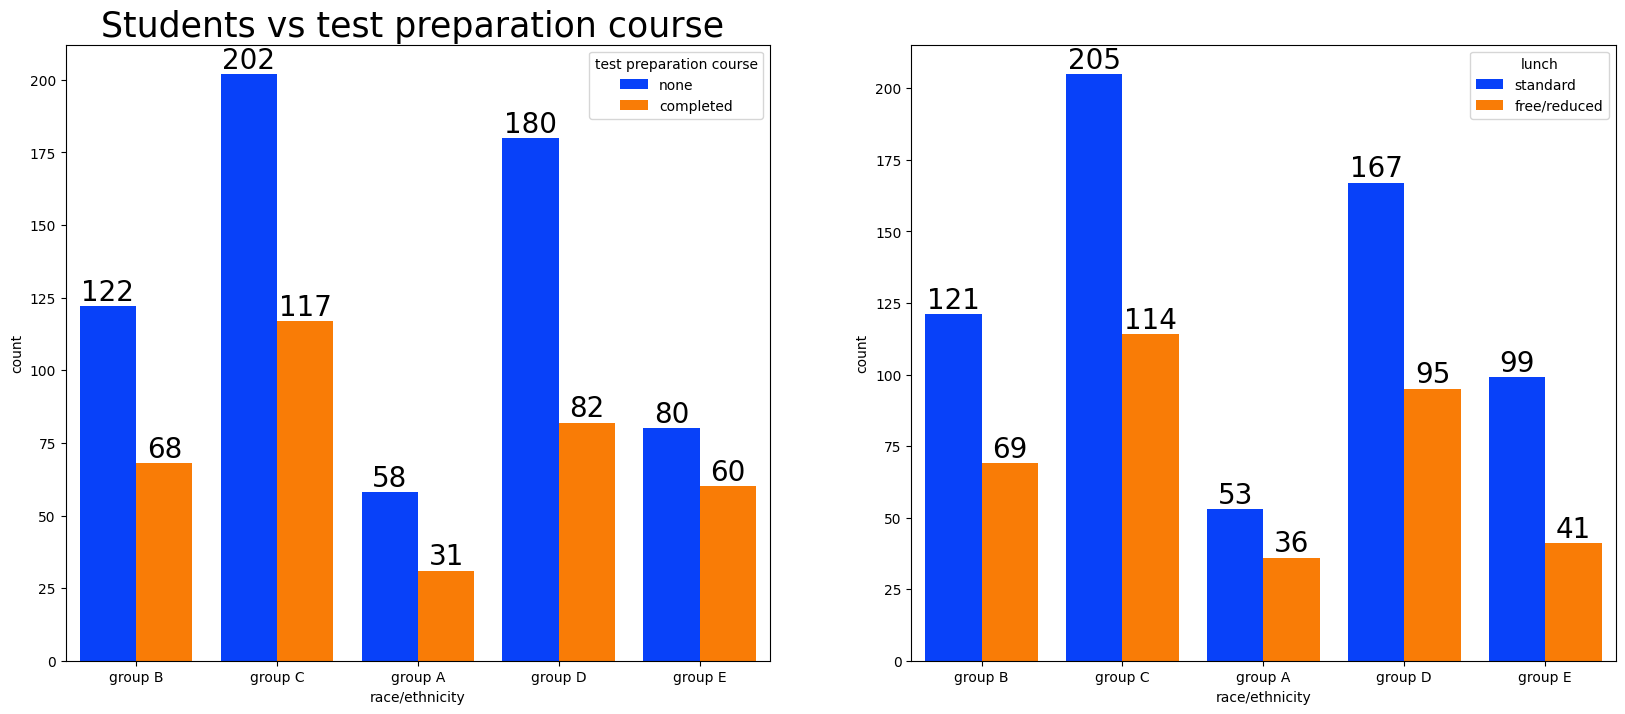

In [146]:
group_by_race_ethinicity
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=student_data['race/ethnicity'],data=student_data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=student_data['race/ethnicity'],data=student_data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

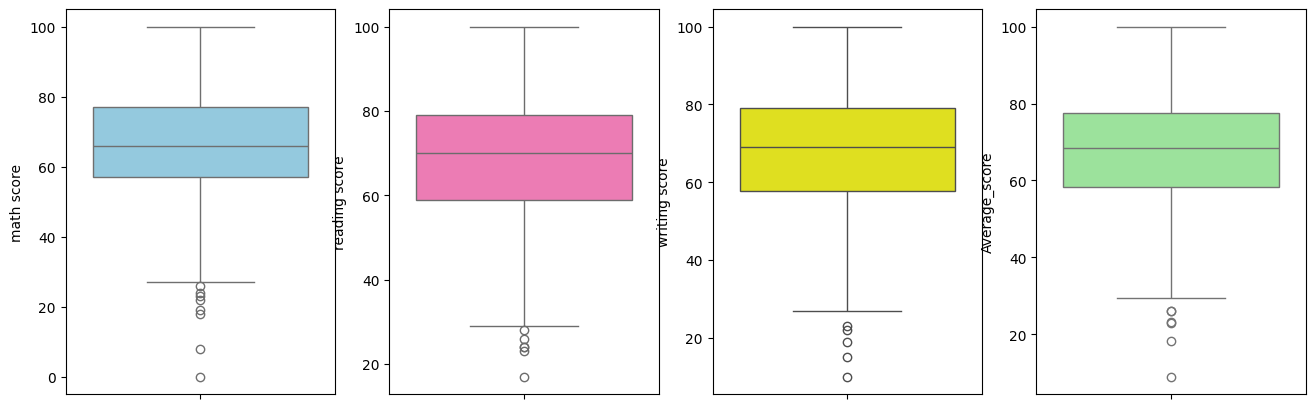

In [155]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_data['Average_score'],color='lightgreen')
plt.show()

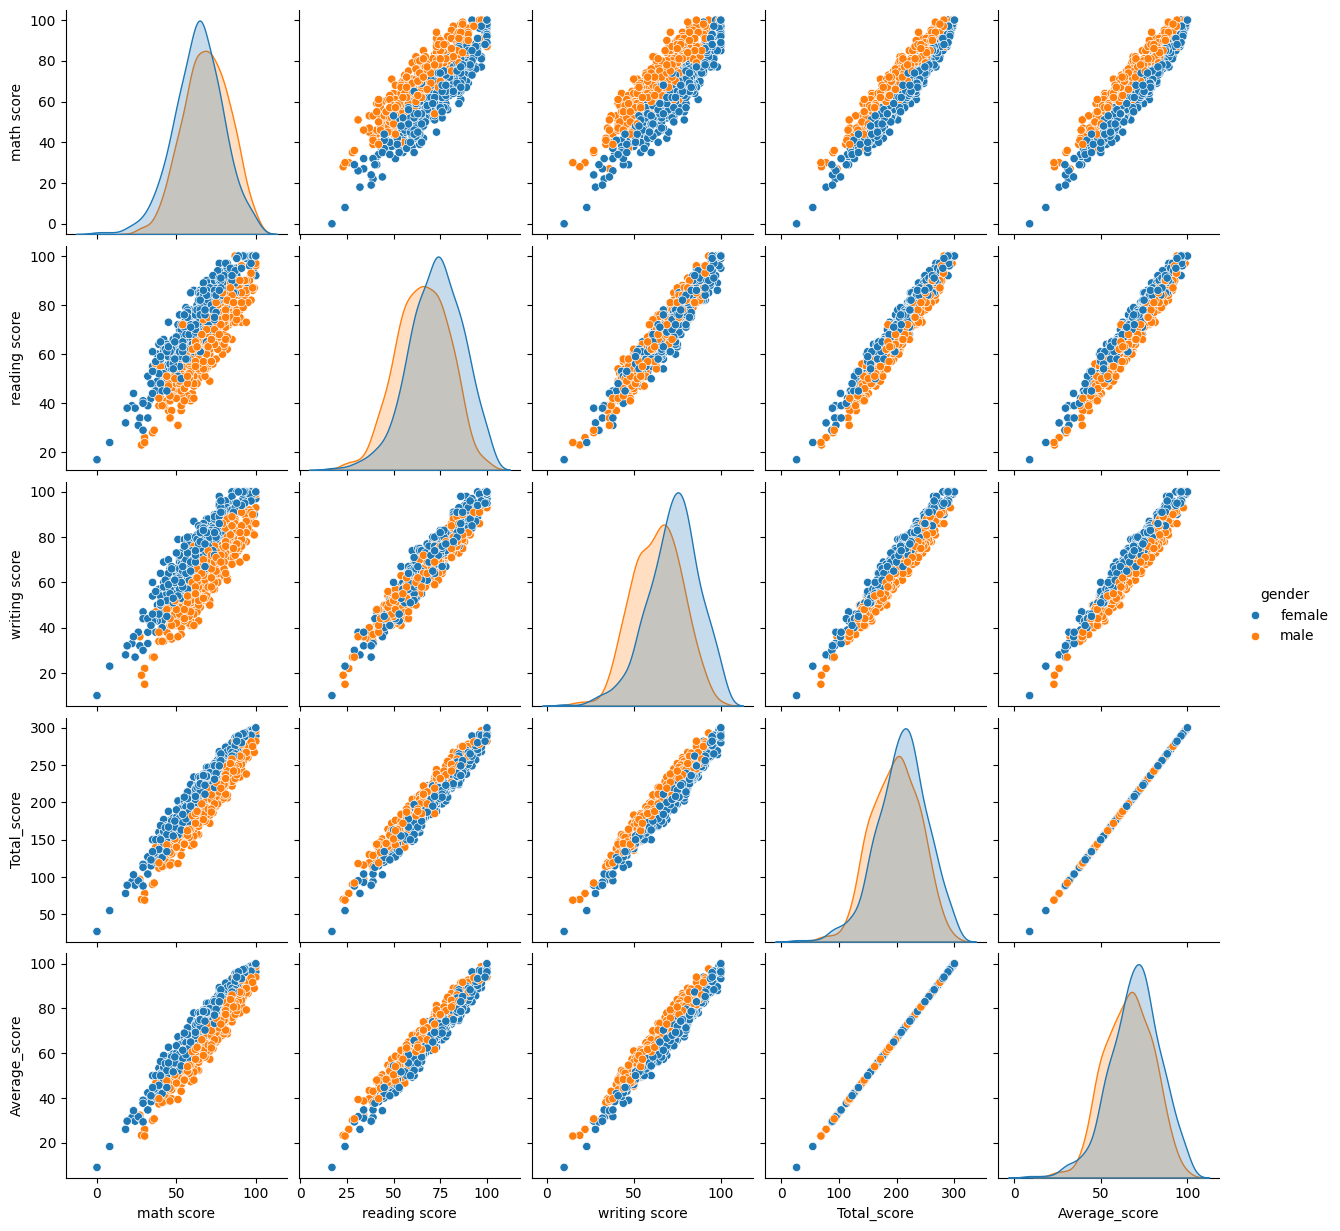

In [156]:
sns.pairplot(student_data,hue='gender')
plt.show()